In [1]:
! pip install numpy

In [2]:
!  pip install pandas 


In [3]:

! pip install nltk
! pip install scikit-learn
! pip install seaborn
! pip install matplotlib
! pip install scipy

In [4]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm
from scipy import stats
from sklearn.model_selection import cross_val_score

In [5]:
import nltk 
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mouhcine/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
print(stopwords.words("english"))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [7]:
fake_dataset = pd.read_csv("Fake.csv")
true_dataset = pd.read_csv("True.csv")
new_artical = pd.read_csv("news_articles.csv")

In [8]:
fake_dataset.shape

(23481, 4)

In [9]:
fake_dataset.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [10]:
fake_dt = fake_dataset.drop(["subject","date"],axis=1)
fake_dt["content"] = fake_dt["title"]+fake_dt["text"]
fake_dt.insert(3,"label","Fake")
fake_dt


,title,text,content,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,Donald Trump Sends Out Embarrassing New Year’...,Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,Drunk Bragging Trump Staffer Started Russian ...,Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",Sheriff David Clarke Becomes An Internet Joke...,Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",Trump Is So Obsessed He Even Has Obama’s Name...,Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,Pope Francis Just Called Out Donald Trump Dur...,Fake
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,McPain: John McCain Furious That Iran Treated ...,Fake
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,Fake
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Fake
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,How to Blow $700 Million: Al Jazeera America F...,Fake


In [11]:
true_dataset.shape




(21417, 4)

In [12]:
true_dataset.head()


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [13]:
true_dt = true_dataset.drop(["subject","date"],axis=1)
true_dt["content"] = true_dt["title"]+true_dt["text"]
true_dt.insert(3,"label","True")
true_dt

,title,text,content,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,"As U.S. budget fight looms, Republicans flip t...",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,U.S. military to accept transgender recruits o...,True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,Senior U.S. Republican senator: 'Let Mr. Muell...,True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,FBI Russia probe helped by Australian diplomat...,True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,Trump wants Postal Service to charge 'much mor...,True
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,'Fully committed' NATO backs new U.S. approach...,True
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",LexisNexis withdrew two products from Chinese ...,True
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,Minsk cultural hub becomes haven from authorit...,True
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,Vatican upbeat on possibility of Pope Francis ...,True


In [14]:
news_art=new_artical.drop([2095])
news_art = news_art.drop(['author','published','site_url','main_img_url','type','title_without_stopwords','text_without_stopwords','hasImage','language'],axis=1)
news_art.isnull().sum()

title     0
text     45
label     0
dtype: int64

In [15]:
news_art = news_art.fillna("")
news_art.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [16]:
news_art["content"] = news_art["title"]+news_art["text"]
news_art 

,title,text,label,content
0,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,Real,muslims busted they stole millions in govt ben...
1,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,Real,re why did attorney general loretta lynch plea...
2,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,Real,breaking weiner cooperating with fbi on hillar...
3,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,Real,pin drop speech by father of daughter kidnappe...
4,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,Real,fantastic trumps point plan to reform healthc...
...,...,...,...,...
2090,prof canoes reek of genocide white privilege,,Real,prof canoes reek of genocide white privilege
2091,teens walk free after gangrape conviction,,Real,teens walk free after gangrape conviction
2092,school named for munichmassacre mastermind,,Real,school named for munichmassacre mastermind
2093,russia unveils satan missile,,Fake,russia unveils satan missile


In [17]:
news_dataset = pd.concat([fake_dt,true_dt,news_art]).reset_index(drop=True)
news_dataset

,title,text,content,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,Donald Trump Sends Out Embarrassing New Year’...,Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,Drunk Bragging Trump Staffer Started Russian ...,Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",Sheriff David Clarke Becomes An Internet Joke...,Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",Trump Is So Obsessed He Even Has Obama’s Name...,Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,Pope Francis Just Called Out Donald Trump Dur...,Fake
...,...,...,...,...
46988,prof canoes reek of genocide white privilege,,prof canoes reek of genocide white privilege,Real
46989,teens walk free after gangrape conviction,,teens walk free after gangrape conviction,Real
46990,school named for munichmassacre mastermind,,school named for munichmassacre mastermind,Real
46991,russia unveils satan missile,,russia unveils satan missile,Fake


In [18]:
! pip install plotly


In [19]:
import plotly 
import plotly.graph_objects as go 
import plotly.express as px 

In [20]:
news_dataset.isnull().sum()

title      0
text       0
content    0
label      0
dtype: int64

In [21]:
news_dataset["label"].replace("Fake",1,inplace=True)
news_dataset["label"].replace("Real",0,inplace=True)

/var/folders/v6/wk77q3_d143217_lqk18tl3c0000gn/T/ipykernel_77973/2374501055.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  news_dataset["label"].replace("Fake",1,inplace=True)
/var/folders/v6/wk77q3_d143217_lqk18tl3c0000gn/T/ipykernel_77973/2374501055.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

In [22]:
news_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46993 entries, 0 to 46992
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    46993 non-null  object
 1   text     46993 non-null  object
 2   content  46993 non-null  object
 3   label    46993 non-null  object
dtypes: object(4)
memory usage: 1.4+ MB


In [23]:
# seprating the data & label
X = news_dataset.drop(columns = "label",axis=1)
Y = news_dataset["label"]
Y.head(100)

0     1
1     1
2     1
3     1
4     1
     ..
95    1
96    1
97    1
98    1
99    1
Name: label, Length: 100, dtype: object

In [24]:
port_stem = PorterStemmer()

In [25]:
from multiprocessing import Pool
from functools import partial 
import numpy as np 

In [26]:
def stemming_optimized(content):
    porter_stemmer = PorterStemmer()
    stemmed = " ".join([porter_stemmer.stem(word) for word in content.split()])
    return stemmed

In [27]:
def process_chunk(texts):
    return [stemming_optimized(text) for text in texts]
def parallel_stemming(texts, num_processes=4):
    # Split the data into chunks
    chunks = np.array_split(texts, num_processes)
    
    # Create a pool of processes
    with Pool(processes=num_processes) as pool:
        # Process chunks in parallel using the separate function
        results = pool.map(process_chunk, chunks)
    
    # Combine results
    return [item for sublist in results for item in sublist]
from tqdm import tqdm
tqdm.pandas()

def stemming_optimized(text):
    porter_stemmer = PorterStemmer()
    stemmed = ' '.join([porter_stemmer.stem(word) for word in text.split()])
    return stemmed
print(f"Starting stemming for {len(news_dataset)} rows...")
news_dataset['content'] = news_dataset['content'].progress_apply(stemming_optimized)
print("Stemming completed!")




Starting stemming for 46993 rows...


100%|██████████| 46993/46993 [08:47<00:00, 89.08it/s] 

Stemming completed!


In [28]:
X =news_dataset["content"].values
Y = news_dataset["label"].values

In [29]:
Y.shape
X.shape



(46993,)

In [30]:
Vectorizer = TfidfVectorizer()
Vectorizer.fit(X)
X = Vectorizer.transform(X)
X.shape




(46993, 155019)

In [31]:
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 9805968 stored elements and shape (46993, 155019)>
  Coords	Values
  (0, 727)	0.02506672639802042
  (0, 2099)	0.019703230151741483
  (0, 2817)	0.04634775300505346
  (0, 3247)	0.05927124690887164
  (0, 3417)	0.09780502915040847
  (0, 3423)	0.04409719251136773
  (0, 3688)	0.054475288769173326
  (0, 3936)	0.0488210244473653
  (0, 4059)	0.08343293034244482
  (0, 4159)	0.11638379970163602
  (0, 4193)	0.048985017028644516
  (0, 4195)	0.06216235184650395
  (0, 4201)	0.08868696582358626
  (0, 5403)	0.41762444385606995
  (0, 6109)	0.07348420120747498
  (0, 7039)	0.0315898353277809
  (0, 8970)	0.01094040970276829
  (0, 8983)	0.030846690242884826
  (0, 9219)	0.02496780109840054
  (0, 11506)	0.0422065058441741
  (0, 11518)	0.07348420120747498
  (0, 12046)	0.07434282247120105
  (0, 12247)	0.01924562959374777
  (0, 12499)	0.012484162337735947
  (0, 12668)	0.025222569512212148
  :	:
  (46988, 98828)	0.06277990345461273
  (46988, 108991)	0.

In [32]:
! pip install --upgrade nbformat

In [33]:
news_dataset.describe(include="all")

,title,text,content,label
count,46993,46993,46993,46993
unique,40512,40588,41133,3
top,no title,,highlights: the trump presid on april 13 at 9:...,1
freq,186,627,8,24775


In [34]:
! pip install "plotly[all]"

In [35]:
import plotly.io as pio
pio.renderers.default = "notebook"

/var/folders/v6/wk77q3_d143217_lqk18tl3c0000gn/T/ipykernel_77973/1846408955.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




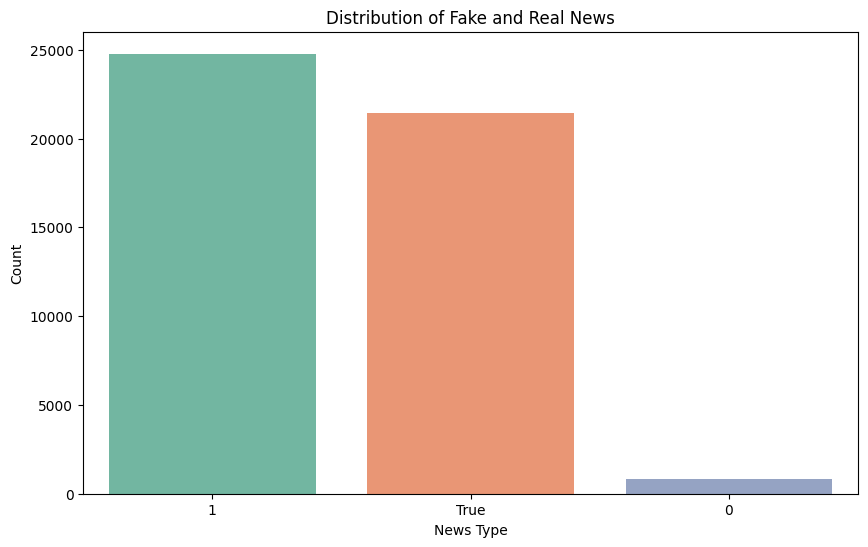

In [36]:
import seaborn as sns

# Create a countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=news_dataset, x='label', palette='Set2')
plt.title("Distribution of Fake and Real News")
plt.xlabel("News Type")
plt.ylabel("Count")
plt.show()

/var/folders/v6/wk77q3_d143217_lqk18tl3c0000gn/T/ipykernel_77973/1195610247.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




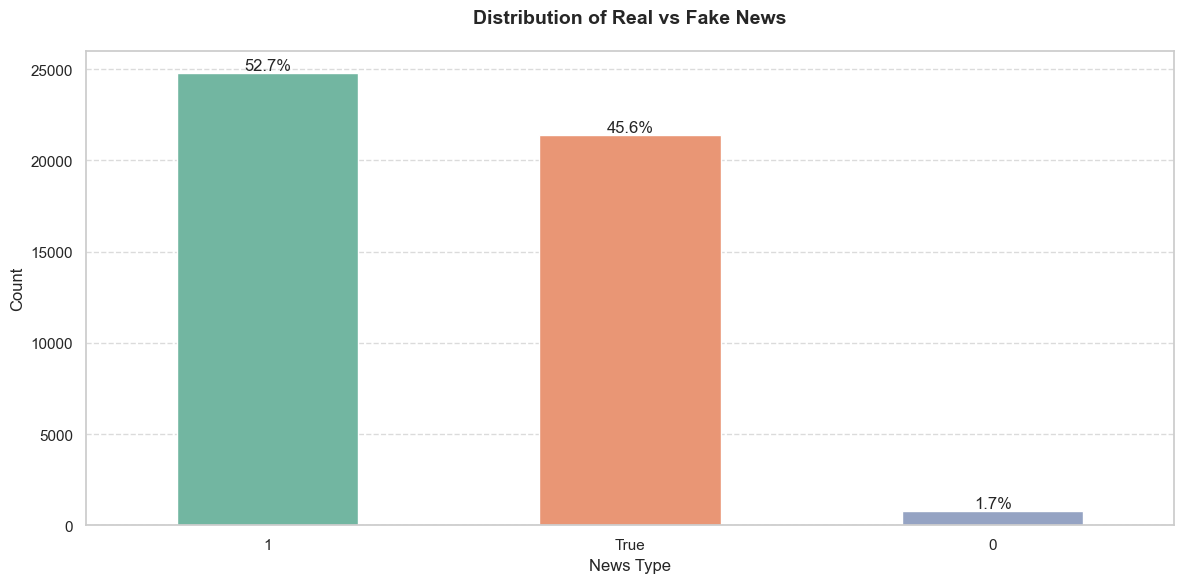

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

# Create the countplot with additional styling
ax = sns.countplot(data=news_dataset,
                  x='label',
                  palette='Set2',
                  width=0.5)

# Customize the plot
plt.title('Distribution of Real vs Fake News', pad=20, size=14, fontweight='bold')
plt.xlabel('News Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add count labels on top of each bar
total = len(news_dataset)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

# Rotate x-axis labels if needed
plt.xticks(rotation=0)

# Add a light grid for better readability
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [39]:
print("Type of X:", type(X))
print("Type of Y:", type(Y))
print("\nSample of Y:", Y[:5])

Type of X: <class 'scipy.sparse._csr.csr_matrix'>
Type of Y: <class 'numpy.ndarray'>

Sample of Y: [1 1 1 1 1]


In [40]:
if isinstance(Y, pd.Series):
    # If Y is a pandas Series
    Y = (Y == 'True').astype(int)
elif isinstance(Y, np.ndarray):
    # If Y is a numpy array
    Y = (Y == 'True').astype(int)
else:
    # If Y is a list or other type
    Y = np.array([1 if val == 'True' else 0 for val in Y])

In [41]:
print("Y values after conversion:", np.unique(Y))
print("Y type:", Y.dtype)

Y values after conversion: [0 1]
Y type: int64


In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.3, 
                                                    stratify=Y, 
                                                    random_state=2)

In [43]:
score = []
model_lr = LogisticRegression()
model_lr.fit(X_train,Y_train)
score.append(model_lr.score(X_test,Y_test))

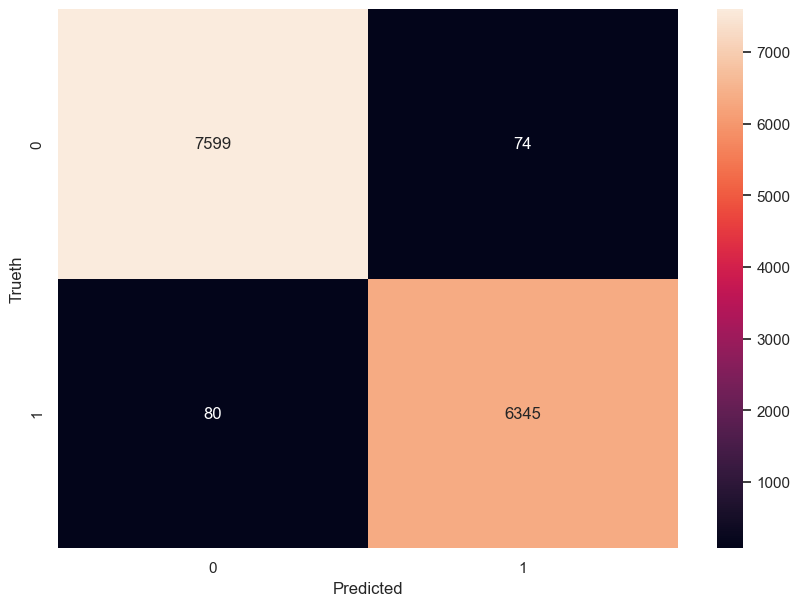

In [44]:
from sklearn import metrics
Y_pred = model_lr.predict(X_test)
cnf_matrix = metrics.confusion_matrix(Y_test,Y_pred)
cnf_matrix
%matplotlib inline
plt.figure(figsize=(10,7))
sn.heatmap(cnf_matrix,annot=True,fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Trueth")
plt.show()


In [97]:
from sklearn.metrics import classification_report 
print(classification_report(Y_test,Y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7673
           1       0.99      0.99      0.99      6425

    accuracy                           0.99     14098
   macro avg       0.99      0.99      0.99     14098
weighted avg       0.99      0.99      0.99     14098



In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


In [46]:
DT = DecisionTreeClassifier()
DT.fit(X_train,Y_train)

DecisionTreeClassifier()

In [47]:
pred_DT = DT.predict(X_test)

In [48]:
score.append(DT.score(X_test,Y_test))

In [49]:
print(classification_report(Y_test,pred_DT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7673
           1       1.00      1.00      1.00      6425

    accuracy                           1.00     14098
   macro avg       1.00      1.00      1.00     14098
weighted avg       1.00      1.00      1.00     14098



Text(92.25, 0.5, 'Truth')

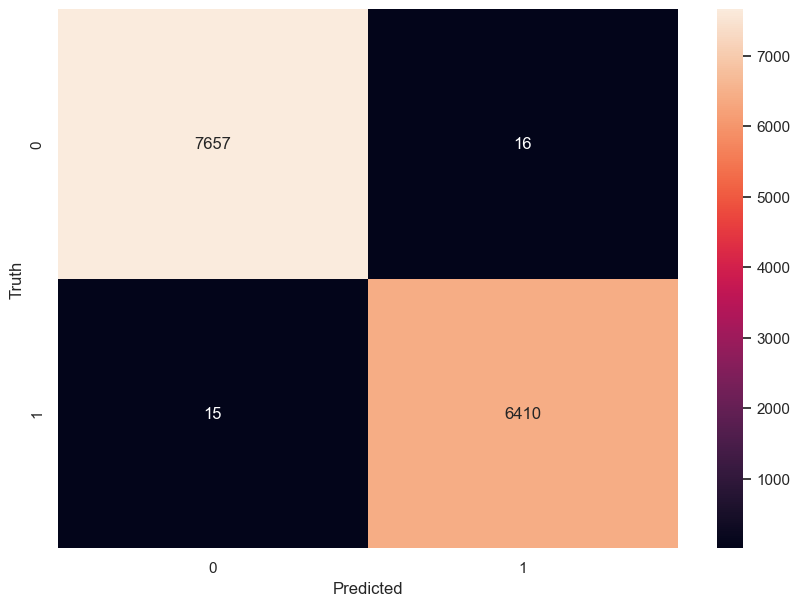

In [50]:
cm = metrics.confusion_matrix(Y_test, pred_DT)
%matplotlib inline
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True,fmt="g")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [51]:
from sklearn.naive_bayes import  ComplementNB
model_NB = ComplementNB().fit(X_train,Y_train)
pred_NB = model_NB.predict(X_test)
model_NB.score(X_test,Y_test)
score.append(model_NB.score(X_test,Y_test))

In [52]:
from sklearn.metrics import classification_report 
print(classification_report(Y_test,pred_NB))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7673
           1       0.96      0.91      0.93      6425

    accuracy                           0.94     14098
   macro avg       0.94      0.94      0.94     14098
weighted avg       0.94      0.94      0.94     14098



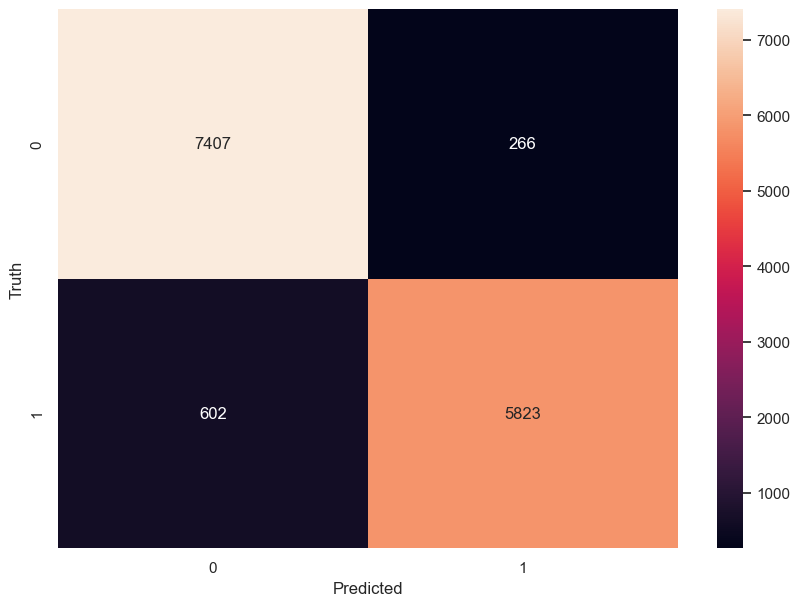

In [53]:
cm = metrics.confusion_matrix(Y_test,pred_NB)
%matplotlib inline
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()



In [55]:
from sklearn.svm import LinearSVC  
model_svc = LinearSVC(random_state=42)
model_svc.fit(X_train, Y_train)
score.append(model_svc.score(X_test, Y_test))

Text(92.25, 0.5, 'Truth')

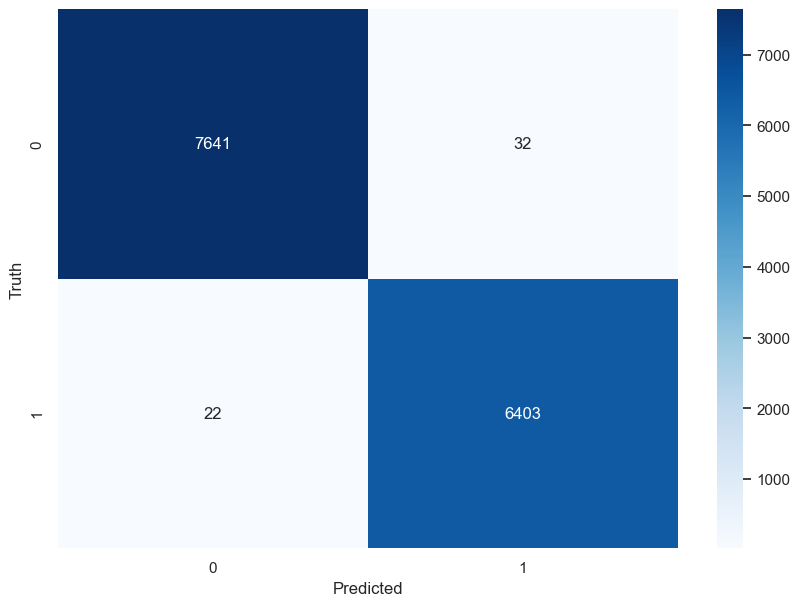

In [56]:
pred_svm=model_svc.predict(X_test)
cm = metrics.confusion_matrix(Y_test, pred_svm)
%matplotlib inline
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True,cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [57]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7673
           1       1.00      1.00      1.00      6425

    accuracy                           1.00     14098
   macro avg       1.00      1.00      1.00     14098
weighted avg       1.00      1.00      1.00     14098



In [59]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier(n_estimators=100)
model_rfc.fit(X_train, Y_train)
score.append(model_rfc.score(X_test,Y_test))
model_rfc.score(X_test,Y_test)

0.9885090083699816

In [60]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, Y_train)
score.append(model_knn.score(X_test,Y_test))

Text(92.25, 0.5, 'Truth')

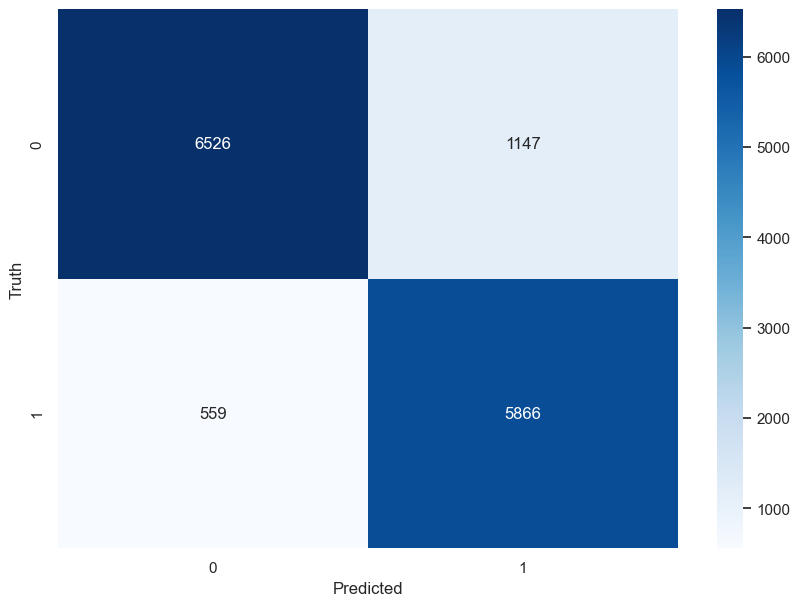

In [61]:
pred_knn=model_knn.predict(X_test)
cm = metrics.confusion_matrix(Y_test, pred_knn)
%matplotlib inline
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True,cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [62]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88      7673
           1       0.84      0.91      0.87      6425

    accuracy                           0.88     14098
   macro avg       0.88      0.88      0.88     14098
weighted avg       0.88      0.88      0.88     14098



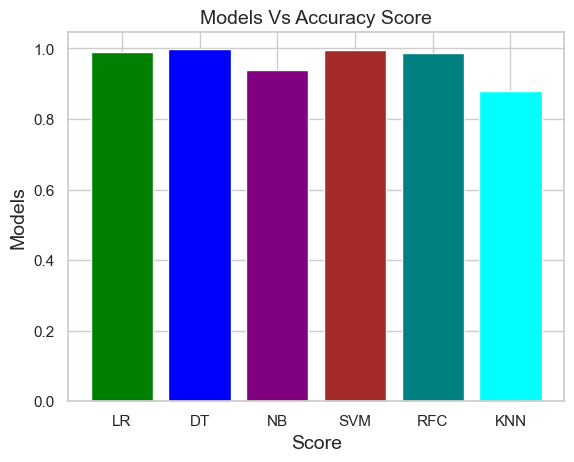

In [65]:
import matplotlib.pyplot as plt
import pandas as pd
   
data = {'model': ['LR', 'DT', 'NB', 'SVM', 'RFC','KNN'],
        'scores': score
       }
df = pd.DataFrame(data)

colors = ['green','blue','purple','brown','teal', 'cyan']
plt.bar(df['model'], df['scores'], color=colors)
plt.title('Models Vs Accuracy Score', fontsize=14)
plt.xlabel('Score', fontsize=14)
plt.ylabel('Models', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
   
data = {'model': modelnames,
        'scores': modeloutcomes
       }
df = pd.DataFrame(data)

colors = ['green','blue','purple','brown','teal', 'cyan']
plt.bar(df['model'], df['scores'], color=colors)
plt.title('Models Vs Accuracy Score', fontsize=14)
plt.xlabel('Score', fontsize=14)
plt.ylabel('Models', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
from sklearn.svm import SVC


In [67]:
models = []
modeloutcomes = []
modelnames = []
def classification_Models(xtrain,xtest, ytrain, ytest ):
    

    
    models.append( ('LR',  LogisticRegression()) )
    models.append( ('DT',DecisionTreeClassifier()) )
    models.append( ('KNN', KNeighborsClassifier()) )
    models.append( ('NB',  ComplementNB()) )
    models.append( ('SVM',  SVC()) )
    models.append(('RFC',RandomForestClassifier()))

    for name,model in models:
        v_results = cross_val_score(model, xtrain, ytrain, cv = 3, 
                                     scoring='accuracy', n_jobs = -1)
        print(name,v_results.mean())
        modeloutcomes.append(v_results.mean())
        modelnames.append(name)
        
classification_Models(X_train,X_test, Y_train, Y_test)

LR 0.9849217206262351


KeyboardInterrupt: 